EXPERIMENT 6 :- Implement program to apply moving average smoothing for data preparation and time series forecasting

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

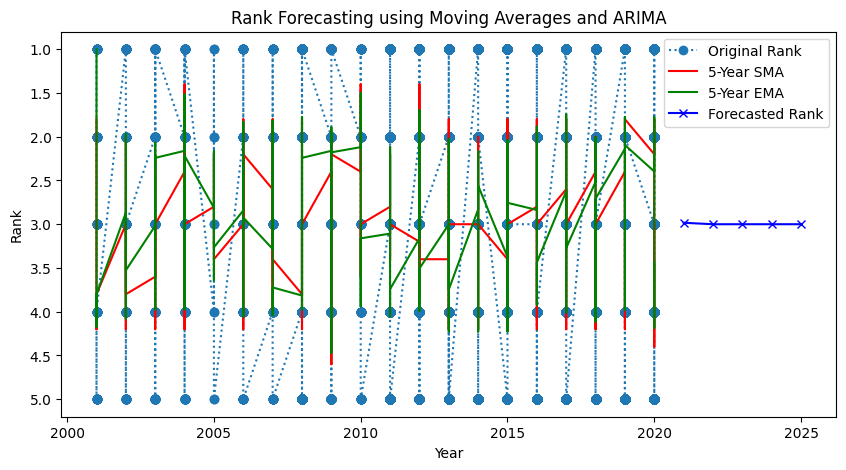

Smoothed data saved to /content/trends_smoothed.csv


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = "/content/trends.csv"
df = pd.read_csv(file_path)

# Sort by YEAR (if not already sorted)
df = df.sort_values(by='year')

# Apply a 5-year simple moving average to RANK
df['SMA_5'] = df['rank'].rolling(window=5).mean()

# Apply Exponential Moving Average (EMA) for better trend smoothing
df['EMA_5'] = df['rank'].ewm(span=5, adjust=False).mean()
# Fit ARIMA Model (p=1, d=1, q=1)
model = ARIMA(df["rank"], order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 5 years
future_years = [df["year"].max() + i for i in range(1, 6)]
forecast = model_fit.forecast(steps=5)

# Create a dataframe for future predictions
forecast_df = pd.DataFrame({"YEAR": future_years, "Forecasted_RANK": forecast})

# Append forecasts to original data
df_forecasted = pd.concat([df, forecast_df], ignore_index=True)

plt.figure(figsize=(10, 5))
plt.plot(df['year'], df['rank'], label="Original Rank", linestyle='dotted', marker='o')
plt.plot(df['year'], df['SMA_5'], label="5-Year SMA", color='red')
plt.plot(df['year'], df['EMA_5'], label="5-Year EMA", color='green')
plt.plot(forecast_df["YEAR"], forecast_df["Forecasted_RANK"], label="Forecasted Rank", color="blue", marker="x")
plt.gca().invert_yaxis()  # Assuming lower rank is better
plt.legend()
plt.title("Rank Forecasting using Moving Averages and ARIMA")
plt.xlabel("Year")
plt.ylabel("Rank")
plt.show()

output_path = "/content/trends_smoothed.csv"
df.to_csv(output_path, index=False)

print(f"Smoothed data saved to {output_path}")
